In [310]:
import numpy as np
#import tensorflow as tf
#from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters

from sklearn.model_selection import cross_val_score

%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10

RANDOM_SEED = 42


In [311]:
ActivityAvril =pd.read_csv('Avril2021.csv', sep=";", encoding = "ISO-8859-1")
ActivityAvril=ActivityAvril.T.copy()
ActivityAvril=ActivityAvril.to_numpy().flatten()
ActivityMai =pd.read_csv('Mai2021.csv', sep=";", encoding = "ISO-8859-1")
ActivityMai=ActivityMai.T.copy()
ActivityMai=ActivityMai.to_numpy().flatten()
ActivityJuin =pd.read_csv('Juin2021.csv', sep=";", encoding = "ISO-8859-1")
ActivityJuin=ActivityJuin.T.copy()
ActivityJuin=ActivityJuin.to_numpy().flatten()
#Activity=Activity.T.copy()

In [312]:
# dataFram to numpy et puis applatir les données dans une colonne
Activity= np.concatenate([ActivityAvril, ActivityMai, ActivityJuin], axis=0)

In [313]:
Activity.shape

(7584,)

In [314]:
data=pd.read_csv('data2122.csv', sep=";", encoding = "ISO-8859-1")
#Linky=pd.read_csv('Enedis_Conso_Heure_20210325-20210427_09311432680380.csv', sep=";", encoding = "ISO-8859-1")

In [315]:
data.isna().sum()

time           0
Temperature    0
Humidity       0
CO2            4
Noise          4
Pressure       0
dtype: int64

In [316]:
data.interpolate(method='quadratic', inplace=True)
data.isna().sum()

time           0
Temperature    0
Humidity       0
CO2            0
Noise          0
Pressure       0
dtype: int64

In [317]:
# timestamp de départ : ici c est 01/4/2021 : 1617235400
data=data[data['time']>=1617235400]


In [318]:
data.shape

(94953, 6)

In [319]:
(data['time']-1617235400)//300

25           0
26           1
27           2
28           3
29           4
         ...  
94973    96174
94974    96175
94975    96176
94976    96177
94977    96178
Name: time, Length: 94953, dtype: int64

In [320]:
#
data['dt']=(data['time']-1617235400)//300

In [321]:
Activity5min=[]
for i in Activity:
    for j in range(3):
        Activity5min.append(i)
    

In [322]:
AcTime=[]
t=0# 1/04/2021 00:03:00
for i in range(len(Activity5min)):
    AcTime.append(t)
    t=t+1

In [323]:
df = pd.DataFrame(list(zip(AcTime,Activity5min)), columns = ['dt','activity'])


In [324]:
df

,dt,activity
0,0,Teletravail
1,1,Teletravail
2,2,Teletravail
3,3,Teletravail
4,4,Teletravail
5,5,Teletravail
6,6,Teletravail
7,7,Teletravail
8,8,Teletravail
9,9,Teletravail


In [325]:
db=pd.merge(data,df, on='dt', how='inner')


In [326]:
db2=db

In [327]:
db[db.activity=="Absent"]

,time,Temperature,Humidity,CO2,Noise,Pressure,dt,activity
98,1617266154,19.3,51,441.0,33.0,1017.4,102,Absent
99,1617266457,19.3,51,415.0,32.0,1017.4,103,Absent
100,1617266759,19.3,51,446.0,32.0,1017.4,104,Absent
101,1617267062,19.3,51,446.0,32.0,1017.4,105,Absent
102,1617267365,19.3,51,450.0,33.0,1017.3,106,Absent
103,1617267668,19.3,51,450.0,32.0,1017.4,107,Absent
104,1617267971,19.3,51,441.0,33.0,1017.4,108,Absent
105,1617268273,19.3,51,433.0,32.0,1017.4,109,Absent
106,1617268576,19.3,51,423.0,32.0,1017.6,110,Absent
107,1617268878,19.3,51,452.0,32.0,1017.7,111,Absent


<AxesSubplot:>

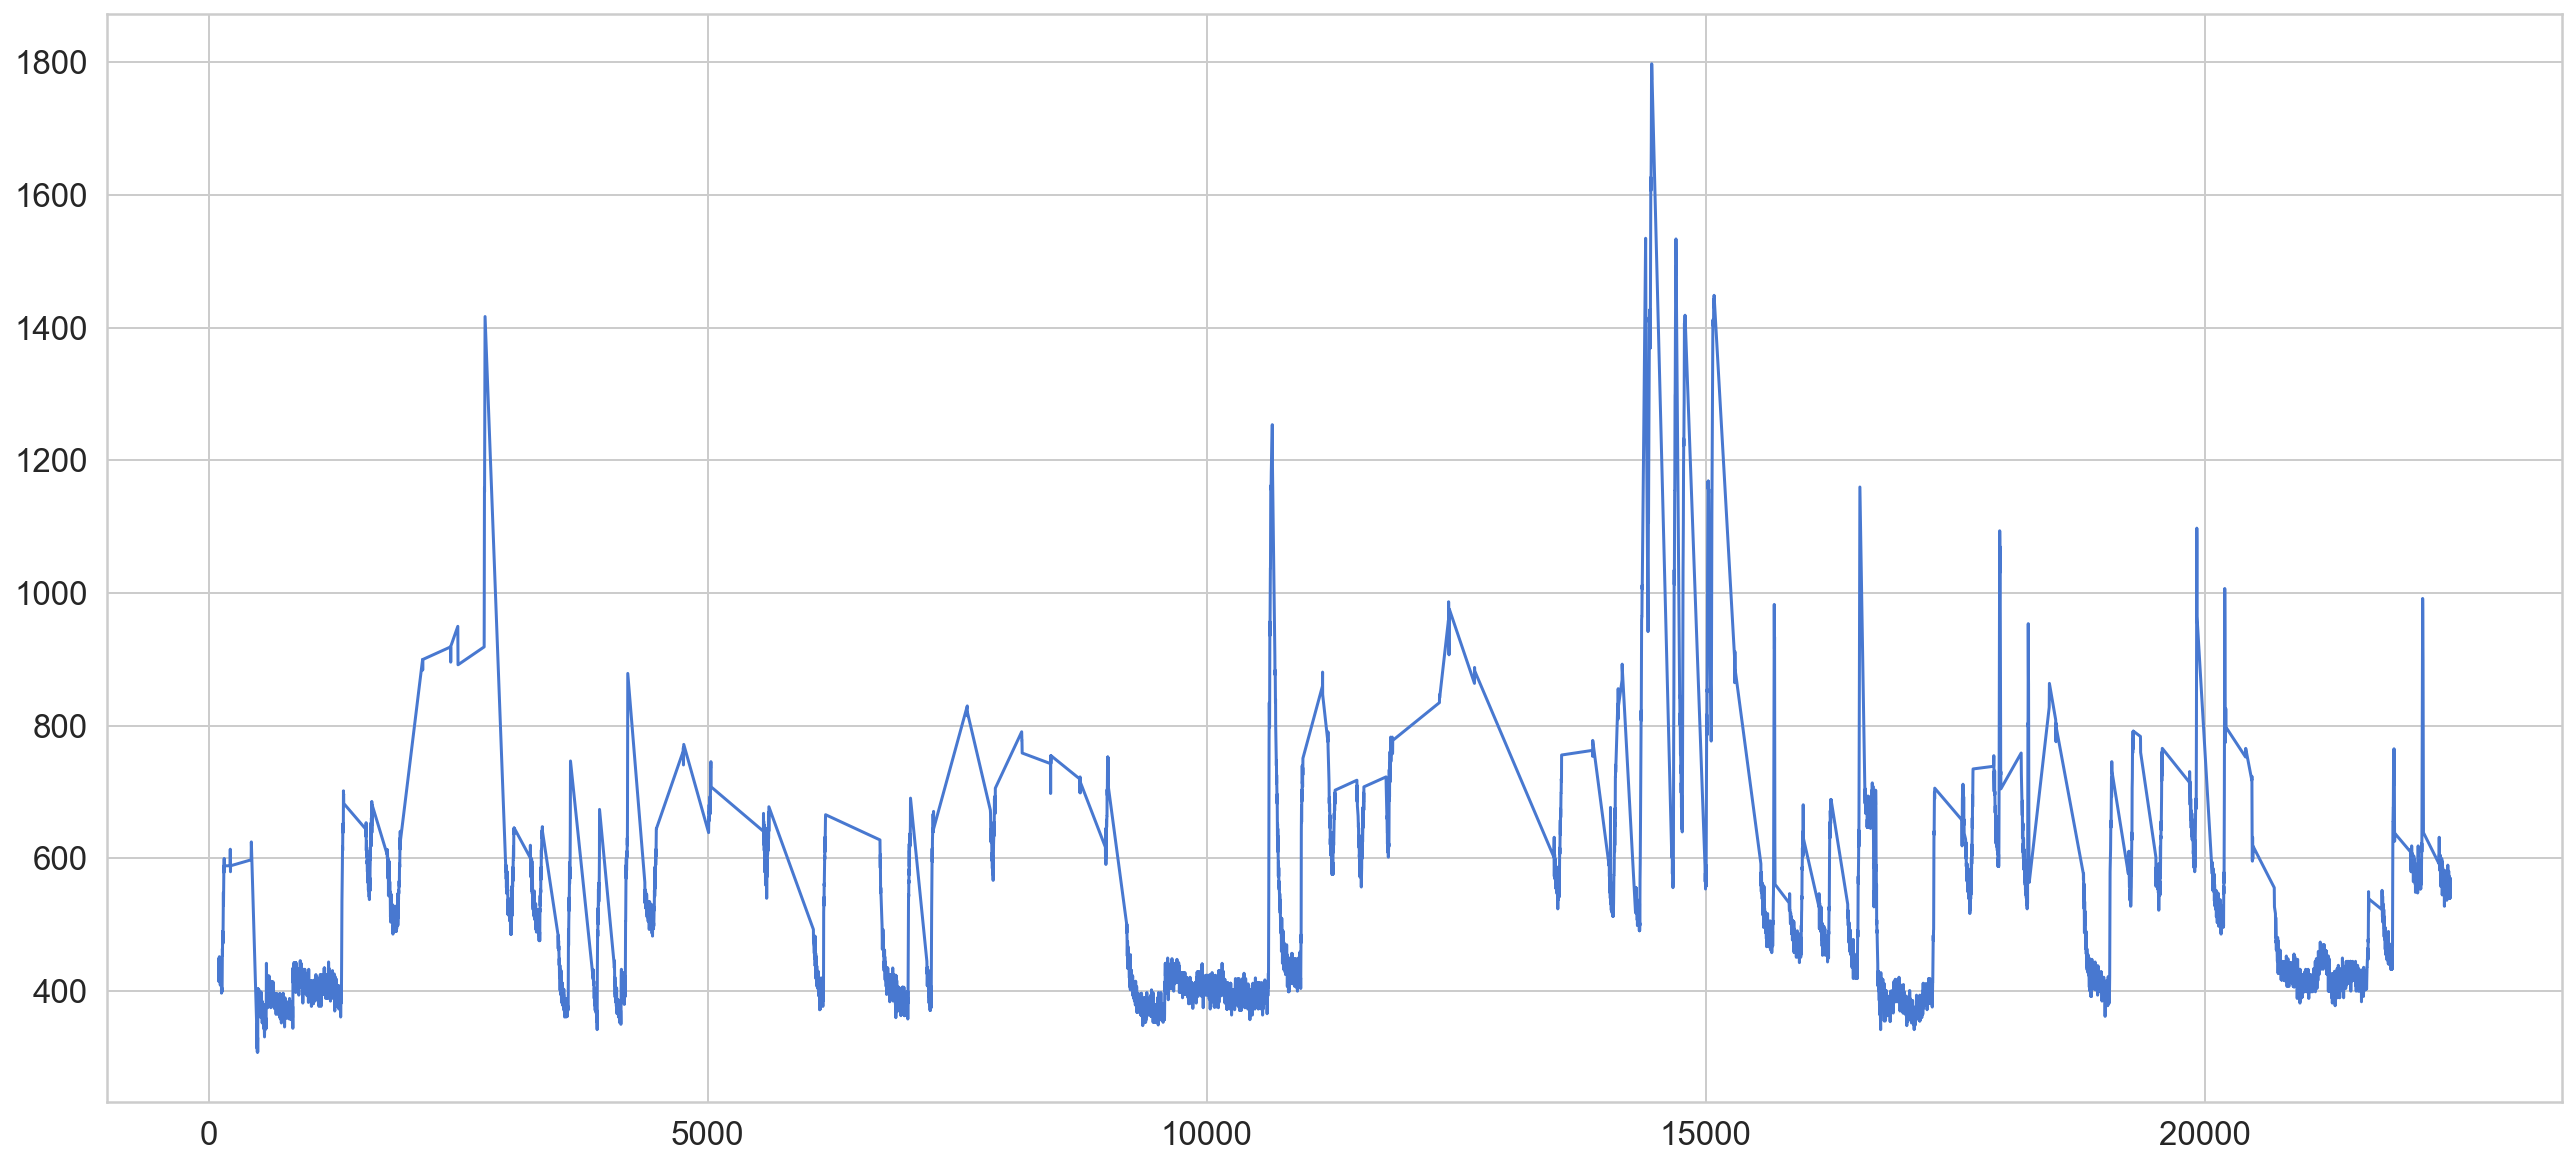

In [328]:
db2[db2.activity=='Absent'].CO2.plot()

<AxesSubplot:>

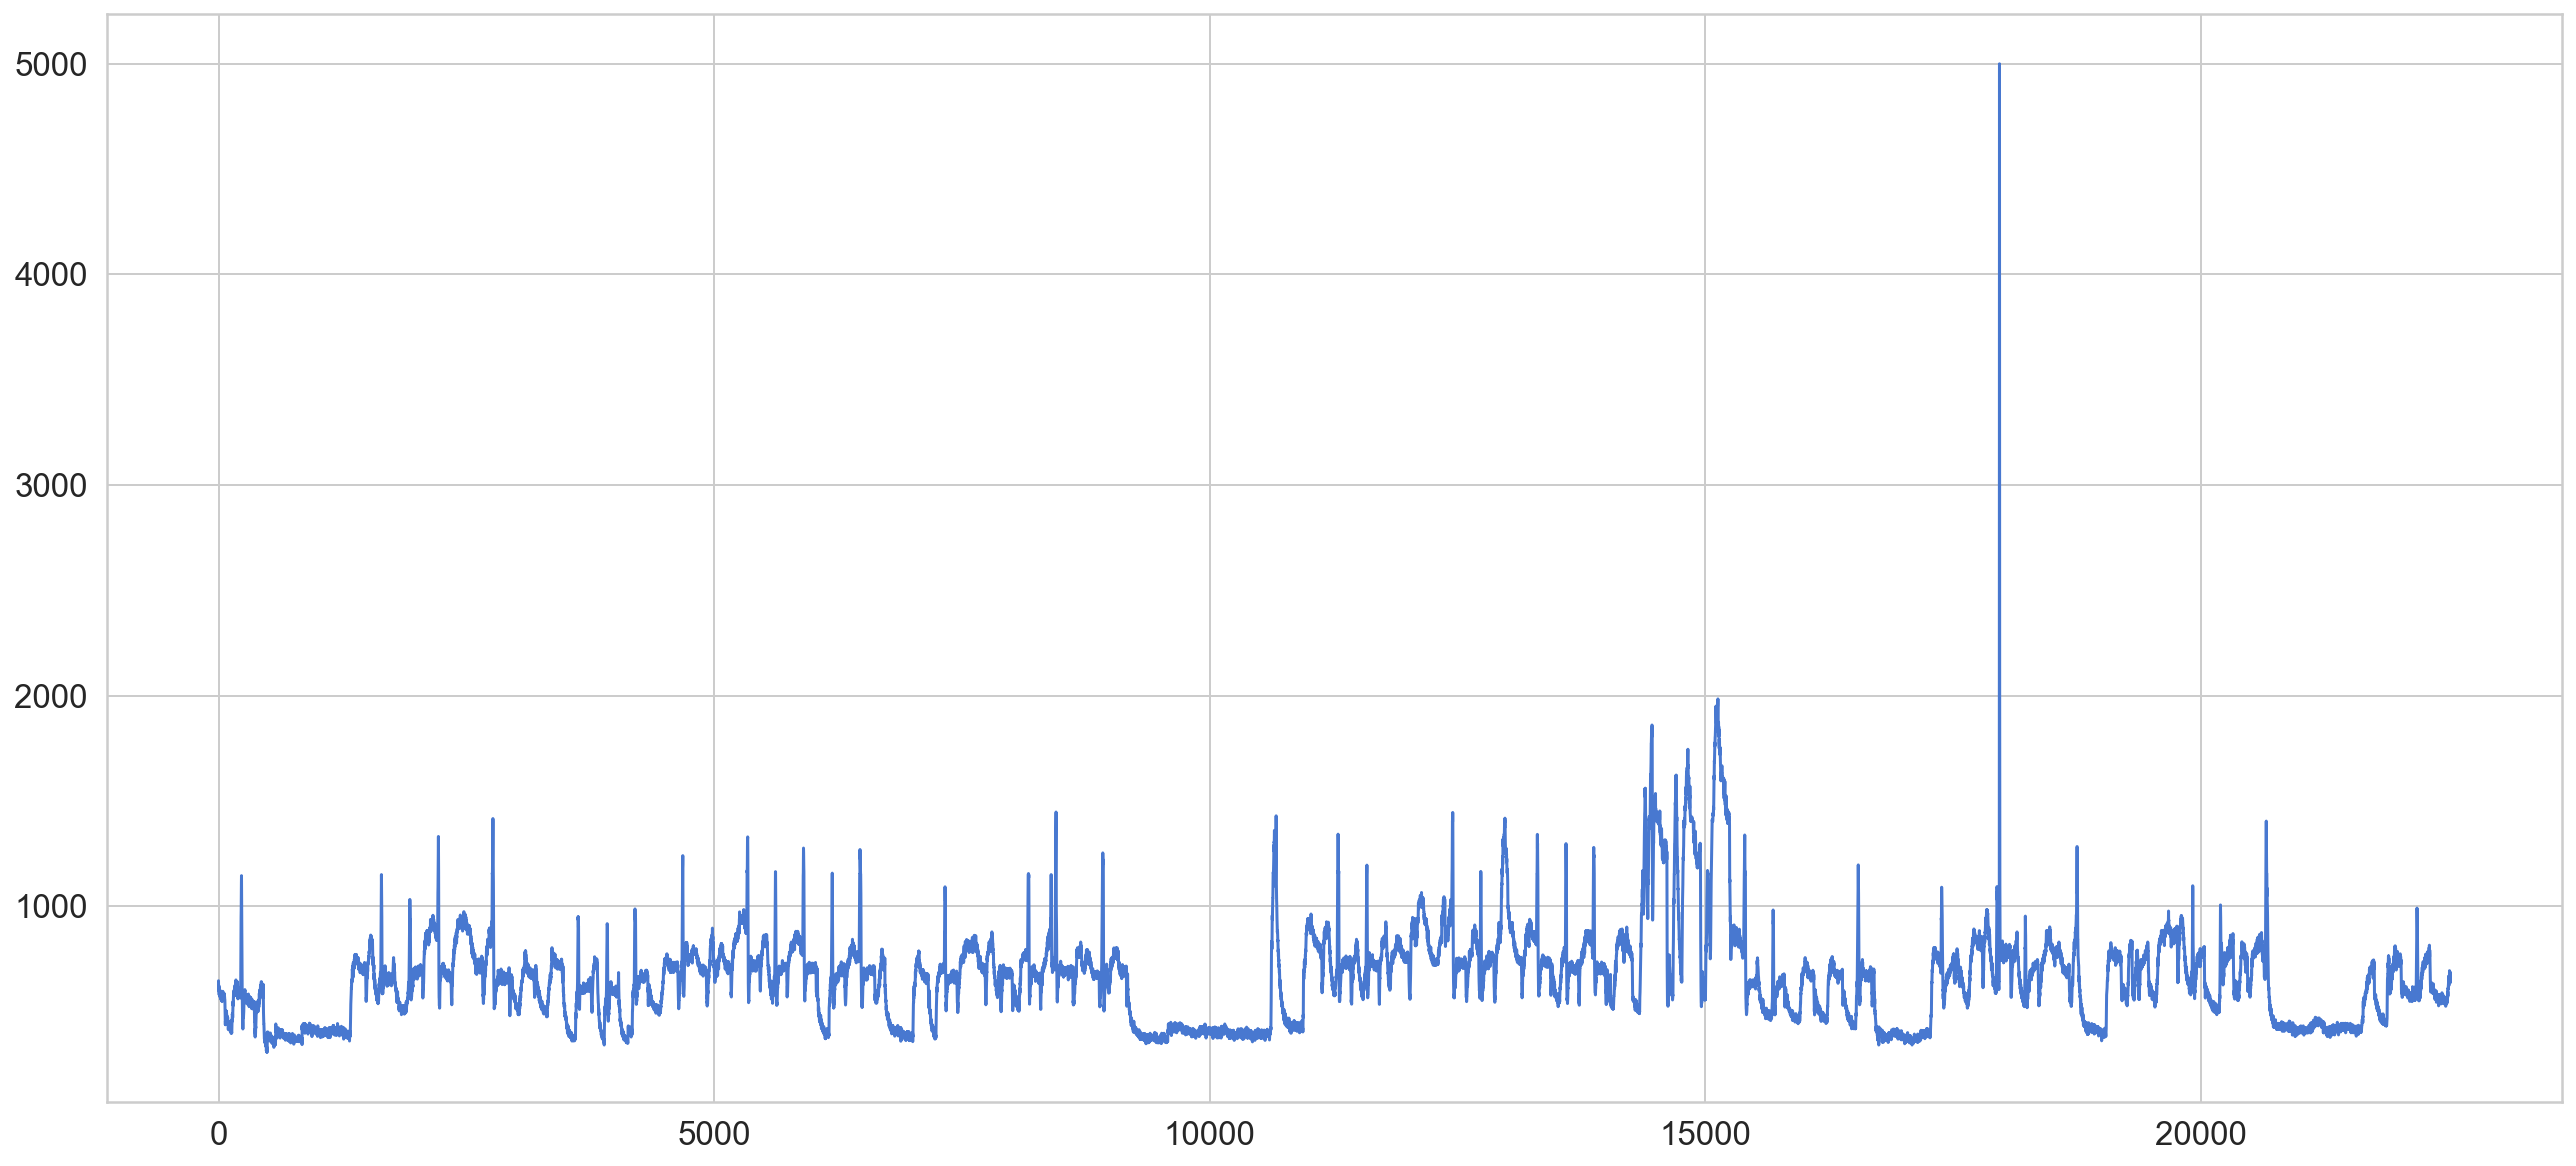

In [329]:
db2.CO2.plot()

In [330]:
db2.index = pd.to_datetime(db2.index)

In [331]:
db["activity"].unique()

array(['Teletravail', 'Sommeil', 'Repas', 'Habillage, douche, toilette',
       'Absent', 'Loisirs devant écran', 'Sport', 'Autres', 'Cuisine',
       'Loisirs', 'Tâches ménagères', '0'], dtype=object)

In [332]:
db2=db.copy()
db2=db2.replace("Teletravail","Present")
db2=db2.replace("Loisirs devant écran","Present")
db2=db2.replace("Habillage, douche, toilette","Present")
db2=db2.replace("Tâches ménagères","Present")
db2=db2.replace("Loisirs","Present")
#db2=db2.replace("Ordinateur","Autres")
db2=db2.replace("Sommeil","Present")
db2=db2.replace("Repas","Present")
db2=db2.replace("Cuisine","Present")
db2=db2.replace("Autres","Present")
db2=db2.replace("Sport","Present")
# remplacement de la classe 0 par absent
db2=db2.replace("0","Absent")


In [333]:
db2["activity"].unique()

array(['Present', 'Absent'], dtype=object)

In [334]:
#db2.to_csv('dataCompletAvrilto18Juin.csv') 

In [335]:
 del db2['time']

In [336]:
 del db2['dt']

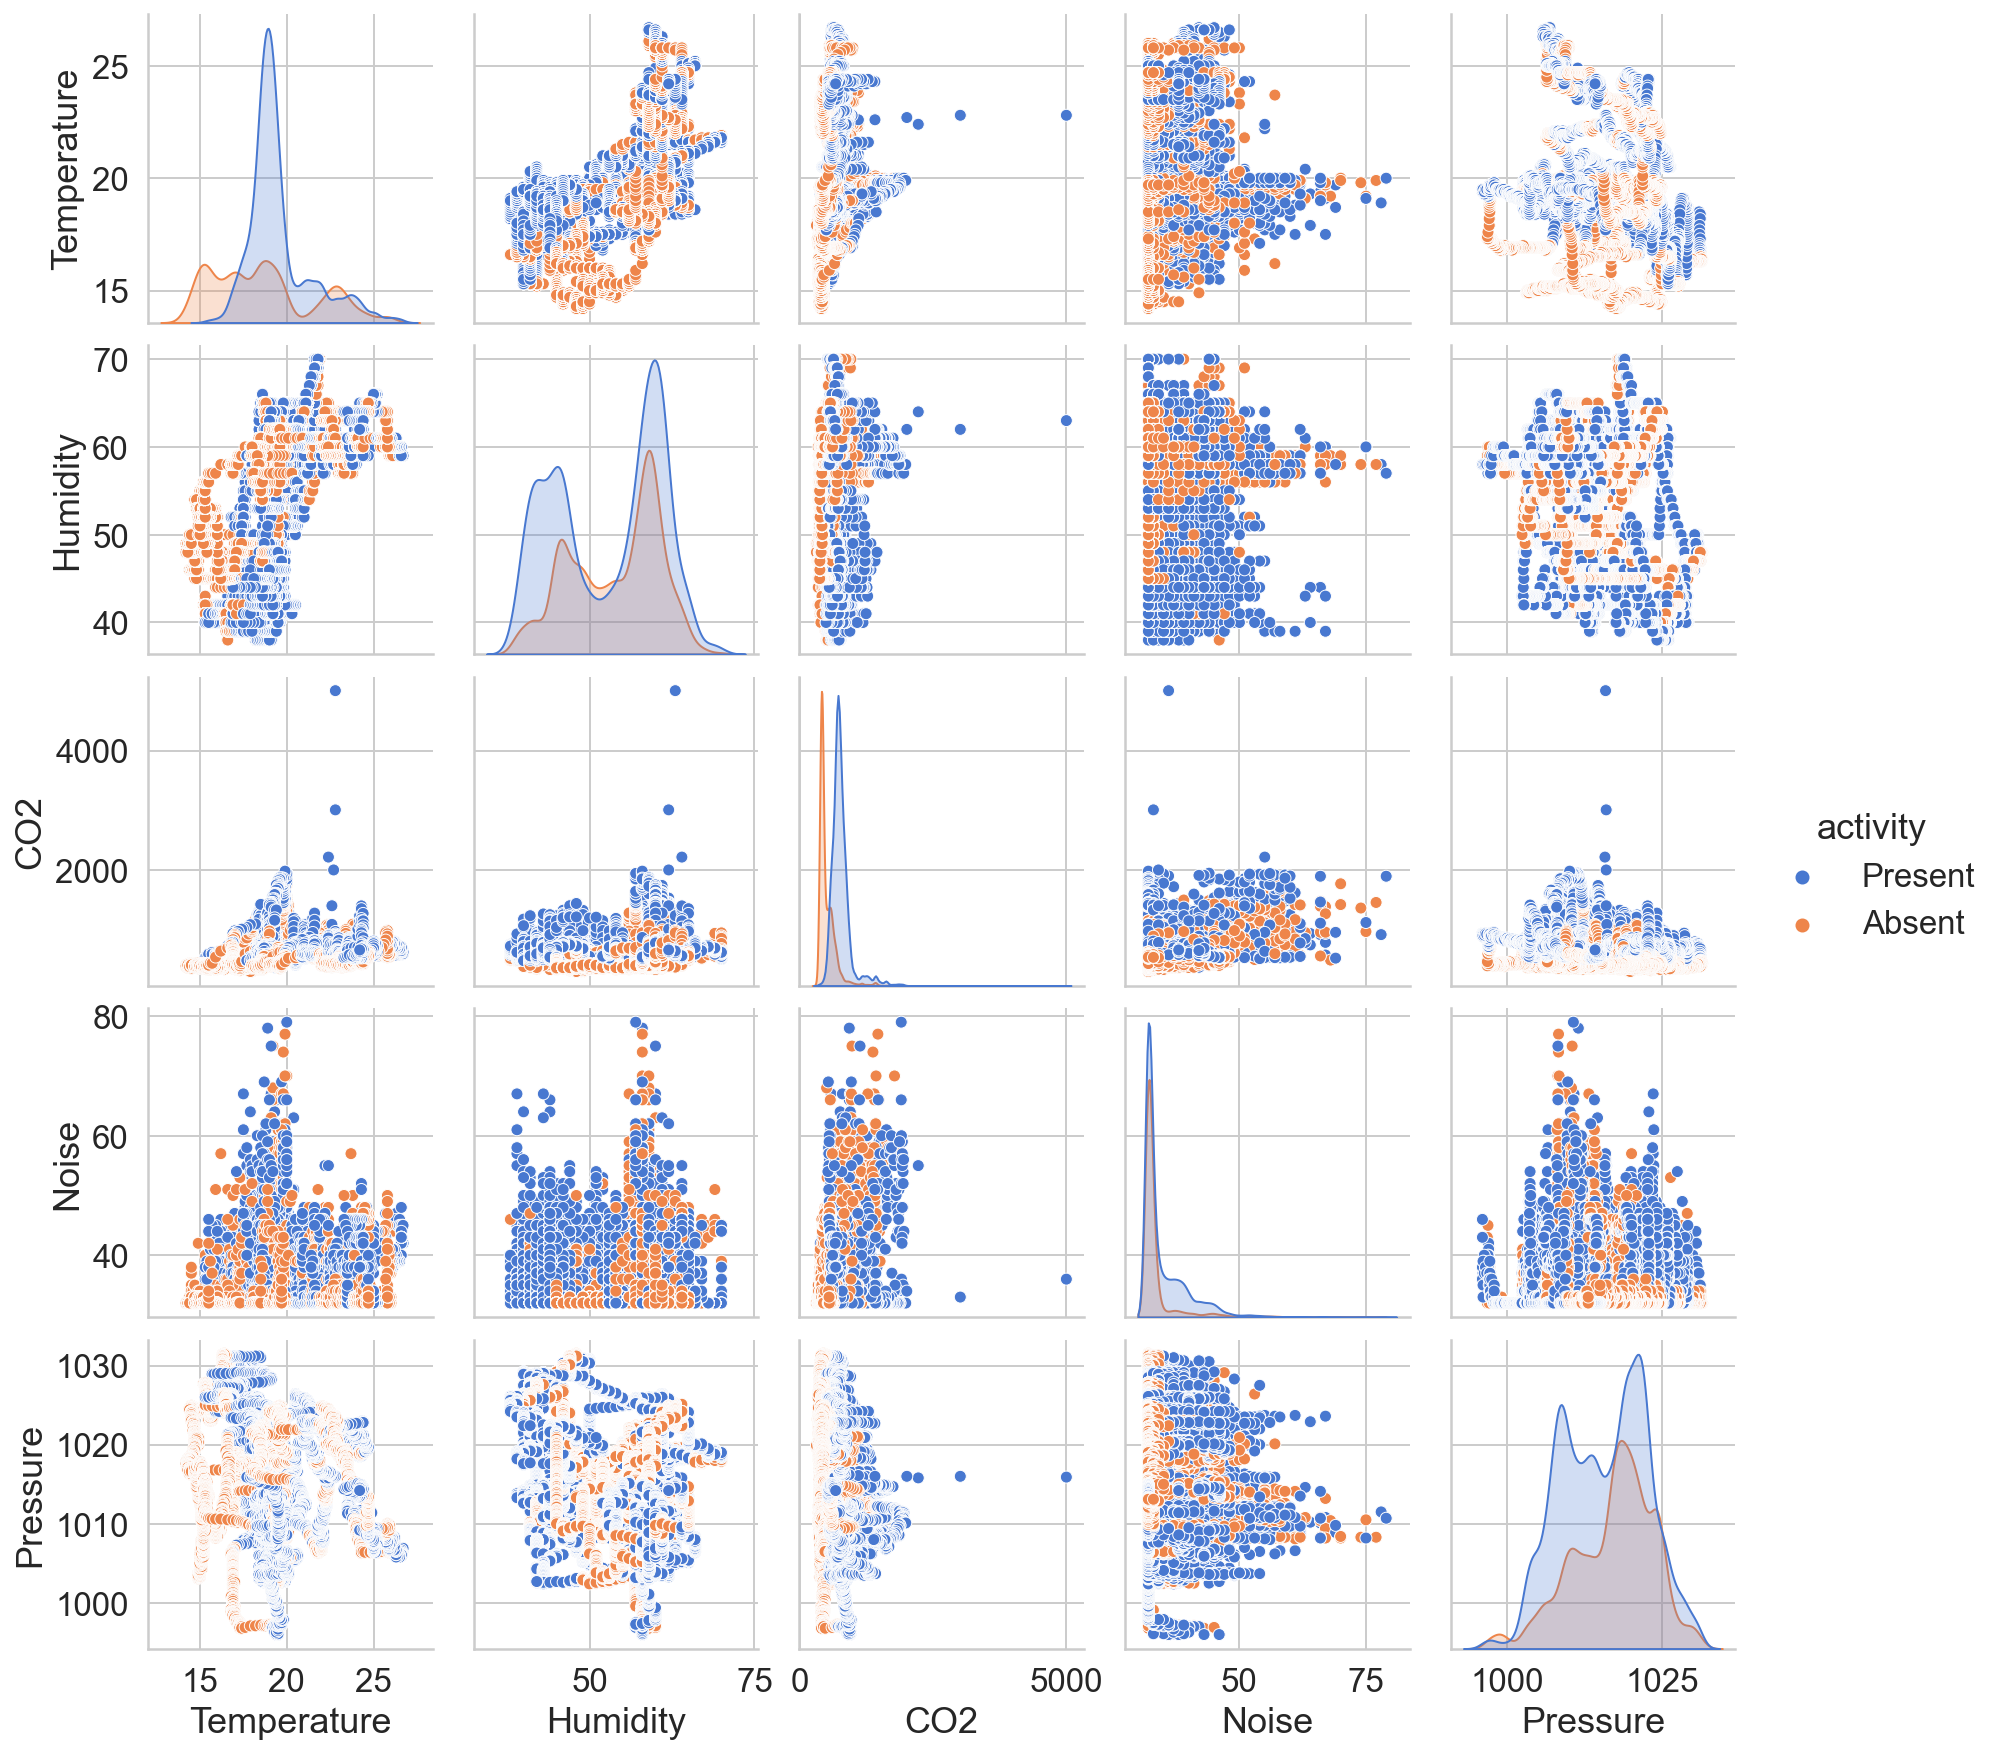

In [337]:
sns.pairplot(db2,  hue='activity')

In [338]:
db2.activity.unique()
db2['activity'].replace(['Absent','Present'],[0,1], inplace=True)

In [339]:
X=db2.drop('activity', axis=1)
y=db2['activity']
from collections import Counter

counter = Counter(y)
for k, v in counter.items():
    dist = v / len(y) * 100
    print(f"Class={k}, n={v} ({dist}%)")

Class=1, n=14185 (62.98006482262576%)
Class=0, n=8338 (37.01993517737424%)


In [340]:
# partitionnement des données en train & test 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

# RandomForestClassifier

In [341]:
# importation de la bibiothèque RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
# construire un model random forest
# Instanciation du modèle
rf_model=RandomForestClassifier(max_features='log2', n_estimators= 300, max_depth=500, criterion='entropy') 
# entrainement du model
rf_model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=500, max_features='log2',
                       n_estimators=300)

In [342]:
# afficher le score du modele sur les données d'entrainement
rf_model.score(X_train,y_train)

0.9995560065964735

In [343]:
# afficher le score du modele sur les données de test
rf_model.score(X_test,y_test)

0.97617285777712

In [344]:
# afficher l’importance des variables de notre modèle de forêt aléatoire
pd.DataFrame(rf_model.feature_importances_,
              index = X_train.columns, 
              columns = ["importance"]).sort_values(
     "importance", 
     ascending = False)

,importance
CO2,0.512611
Temperature,0.186702
Pressure,0.130635
Humidity,0.102996
Noise,0.067056


# Matrice de confusion snas le GridSearchCV

In [345]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, rf_model.predict(X_test)),
             index = ["Present_data", "Abscent_data"],
             columns = ["Present_predit", "Abscent_predit"])

,Present_predit,Abscent_predit
Present_data,2360,117
Abscent_data,44,4236


In [374]:
from sklearn import metrics

y_pred = rf_model.predict(X_test)
y_true = y_test
metrics.precision_recall_fscore_support(y_true, y_pred, beta=1)

(array([0.98169717, 0.97312198]),
 array([0.95276544, 0.98971963]),
 array([0.96701496, 0.98135063]),
 array([2477, 4280], dtype=int64))

In [348]:
#db2['Activity_Pred']=model.predict(X)

# AdaBoostClassifier

In [349]:
from sklearn.ensemble import AdaBoostClassifier
clf_AdaBoost = AdaBoostClassifier(n_estimators=200, random_state=42)
clf_AdaBoost.fit(X_train, y_train)
clf_AdaBoost.score(X_test, y_test)

0.9035074737309456

In [350]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, clf_AdaBoost.predict(X_test)),
             index = ["Present_data", "Abscent_data"],
             columns = ["Present_predit", "Abscent_predit"])

,Present_predit,Abscent_predit
Present_data,2035,442
Abscent_data,210,4070


In [351]:
from sklearn import metrics
y_pred = clf_AdaBoost.predict(X_test)
y_true = y_test
metrics.precision_recall_fscore_support(y_true, y_pred, beta=1)

(array([0.9064588 , 0.90203901]),
 array([0.82155834, 0.95093458]),
 array([0.86192291, 0.92584167]),
 array([2477, 4280], dtype=int64))

In [352]:
clf_AdaBoost1 = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=50, max_features=2))
clf_AdaBoost1.fit(X_train, y_train)


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=50,
                                                         max_features=2))

In [353]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, clf_AdaBoost1.predict(X_test)),
             index = ["Present_data", "Abscent_data"],
             columns = ["Present_predit", "Abscent_predit"])

,Present_predit,Abscent_predit
Present_data,2348,129
Abscent_data,51,4229


In [354]:
from sklearn import metrics

y_pred = clf_AdaBoost1.predict(X_test)
y_true = y_test
metrics.precision_recall_fscore_support(y_true, y_pred, beta=1)

(array([0.97874114, 0.97039927]),
 array([0.94792087, 0.98808411]),
 array([0.9630845 , 0.97916184]),
 array([2477, 4280], dtype=int64))

# DecisionTreeClassifier

In [359]:
from sklearn.tree import DecisionTreeClassifier
#clf_tree = DecisionTreeClassifier(max_depth=4, criterion='gini')
clf_tree= DecisionTreeClassifier(max_features='log2', max_depth=500, criterion='entropy')
clf_tree.fit(X_train, y_train)
y_pred = clf_tree.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9601894331804055

In [360]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, clf_tree.predict(X_test)),
             index = ["Present_data", "Abscent_data"],
             columns = ["Present_predit", "Abscent_predit"])

,Present_predit,Abscent_predit
Present_data,2344,133
Abscent_data,136,4144


In [361]:
from sklearn import metrics

y_pred = clf_tree.predict(X_test)
y_true = y_test
metrics.precision_recall_fscore_support(y_true, y_pred, beta=1)

(array([0.94516129, 0.96890344]),
 array([0.94630602, 0.9682243 ]),
 array([0.94573331, 0.96856375]),
 array([2477, 4280], dtype=int64))

In [375]:

from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, Dtree_best.predict(X_test)),
             index = ["Present_data", "Abscent_data"],
             columns = ["Present_predit", "Abscent_predit"])

,Present_predit,Abscent_predit
Present_data,2436,41
Abscent_data,48,4232


In [363]:
from sklearn import metrics

y_pred = Dtree_best.predict(X_test)
y_true = y_test
metrics.precision_recall_fscore_support(y_true, y_pred, beta=1)

(array([0.98067633, 0.99040487]),
 array([0.98344772, 0.98878505]),
 array([0.98206007, 0.98959429]),
 array([2477, 4280], dtype=int64))

In [364]:
## SVM

In [365]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

svc_model = make_pipeline(StandardScaler(), SVC(C=10, gamma=1))
svc_model.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=10, gamma=1))])

In [366]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_sc=scaler.fit_transform(X_train)

In [367]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, svc_model.predict(X_test)),
             index = ["Present_data", "Abscent_data"],
             columns = ["Present_predit", "Abscent_predit"])

,Present_predit,Abscent_predit
Present_data,2276,201
Abscent_data,101,4179


In [368]:
from sklearn import metrics

y_pred = svc_model.predict(X_test)
y_true = y_test
metrics.precision_recall_fscore_support(y_true, y_pred, beta=1)

(array([0.95750947, 0.95410959]),
 array([0.91885345, 0.97640187]),
 array([0.93778327, 0.96512702]),
 array([2477, 4280], dtype=int64))

# KNN

In [369]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model=KNeighborsClassifier(n_neighbors=1,metric='manhattan')
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=1)

In [370]:
KNN_model.score(X_test,y_test)

0.9326624241527305

In [371]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, KNN_model.predict(X_test)),
             index = ["Present_data", "Abscent_data"],
             columns = ["Present_predit", "Abscent_predit"])

,Present_predit,Abscent_predit
Present_data,2244,233
Abscent_data,222,4058


In [372]:
from sklearn import metrics
y_pred = KNN_model.predict(X_test)
y_true = y_test
metrics.precision_recall_fscore_support(y_true, y_pred, beta=1)

(array([0.90997567, 0.9457003 ]),
 array([0.9059346 , 0.94813084]),
 array([0.90795064, 0.94691401]),
 array([2477, 4280], dtype=int64))